<a href="https://colab.research.google.com/github/Stonetenth2005/Machine-Learning/blob/main/14-CompleteCaseAnalysis/CCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().mean()*100 # to know which columns don't have significant missing data

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
df.shape

(19158, 13)

In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean()*100<5 and df[var].isnull().mean()*100>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [ ]:
len(df[cols].dropna())/len(df) # to check how much data would remain after removing

0.8968577095730244

In [ ]:
new_df = df[cols].dropna()

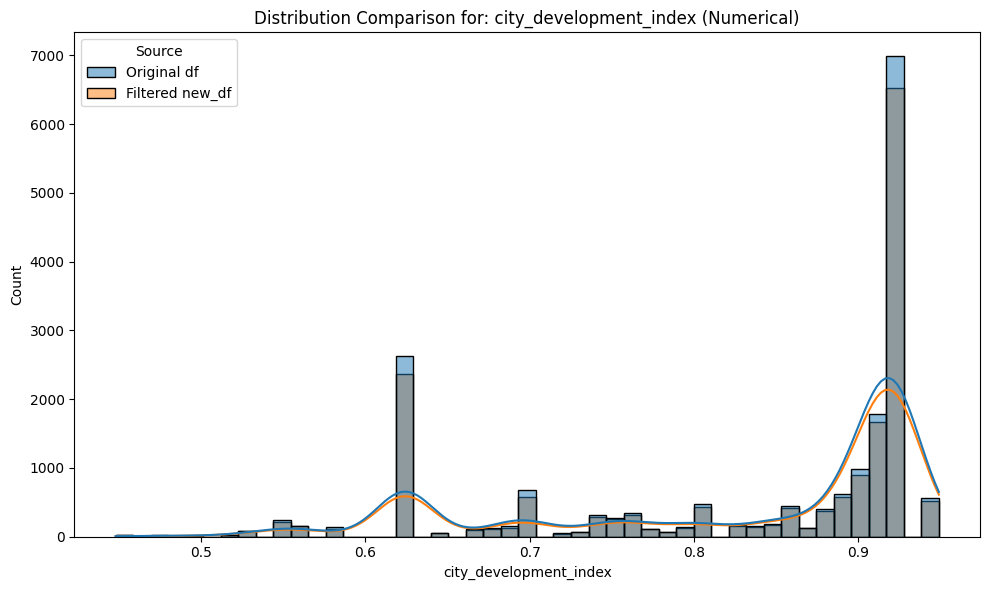

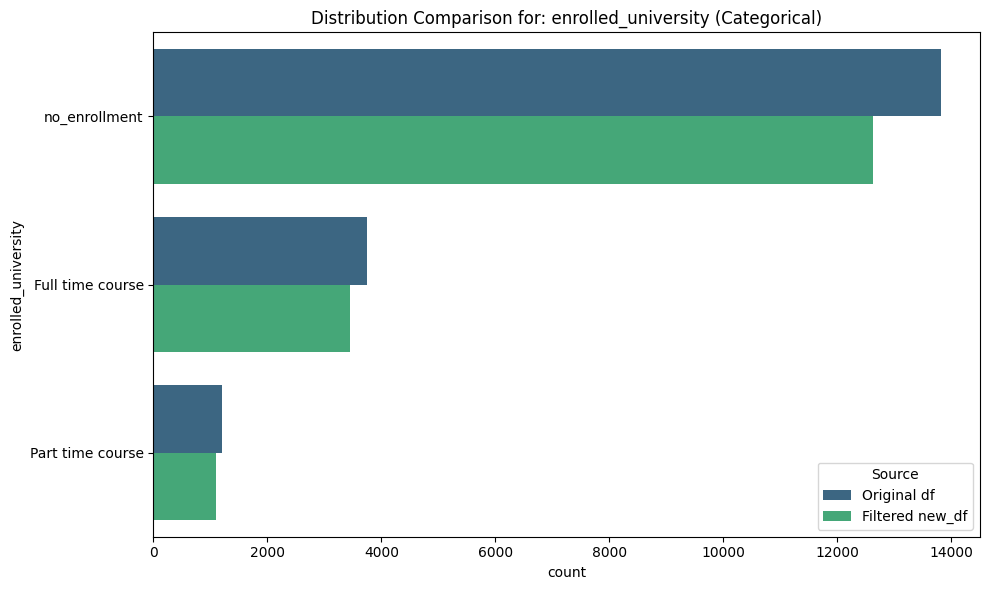

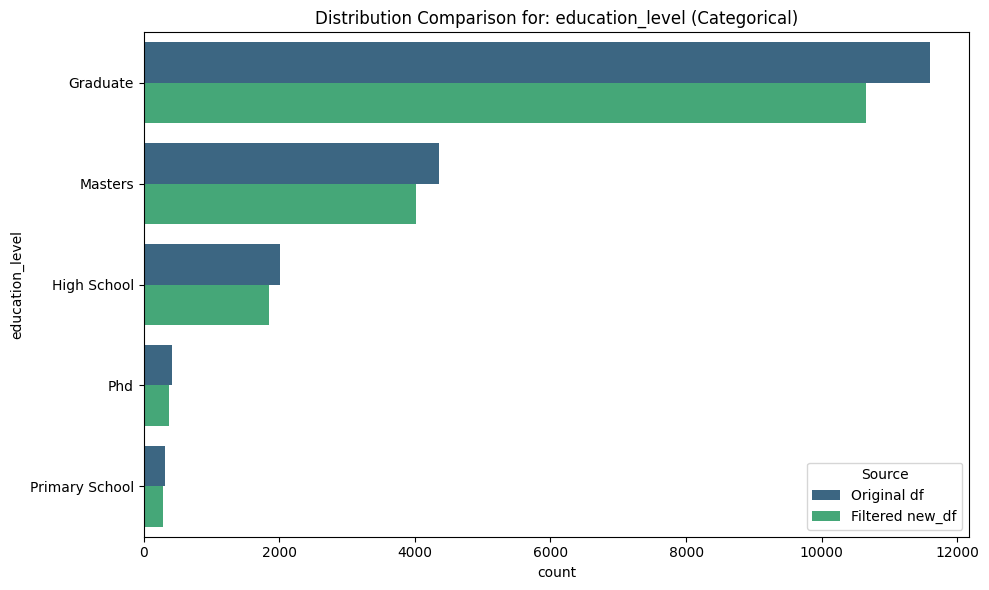

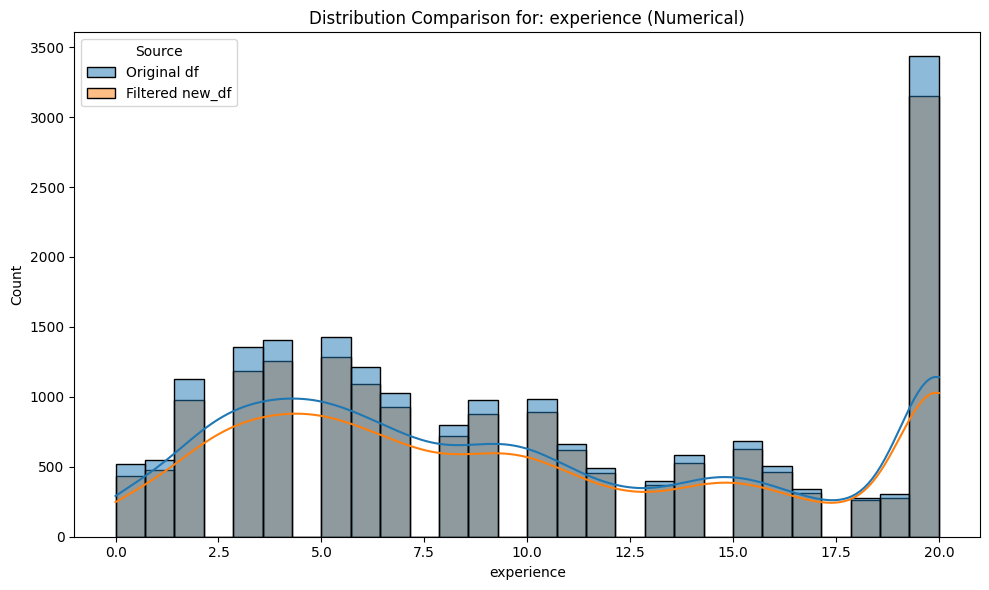

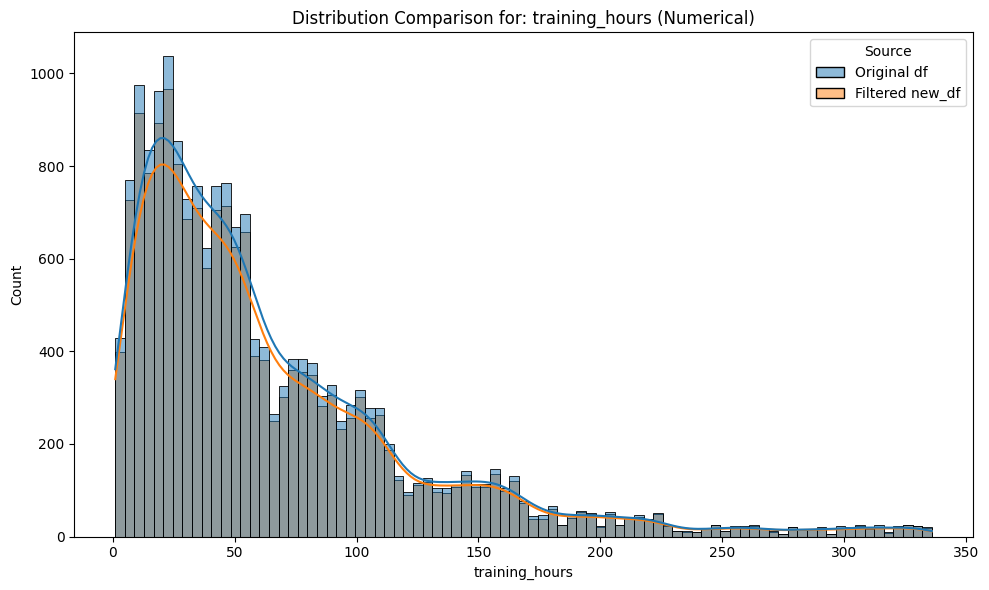

In [ ]:
# Columns common to both dataframes
common_cols = ['city_development_index', 'enrolled_university', 'education_level', 'experience', 'training_hours']

# Create copies of the relevant columns and add a source column to each
df_subset = df[common_cols].copy()
df_subset['Source'] = 'Original df'

new_df_copy = new_df[common_cols].copy()
new_df_copy['Source'] = 'Filtered new_df'

# Concatenate the two subsets for plotting, ignoring their original indices
combined_df = pd.concat([df_subset, new_df_copy], ignore_index=True)

for col in common_cols:
    plt.figure(figsize=(10, 6))
    if combined_df[col].dtype in ['int64', 'float64']:
        # Numerical column: use histplot with hue for comparison
        sns.histplot(data=combined_df, x=col, hue='Source', kde=True, common_norm=False)
        plt.title(f'Distribution Comparison for: {col} (Numerical)')
    else:
        # Categorical column: use countplot with hue for comparison
        sns.countplot(data=combined_df, y=col, hue='Source', palette='viridis')
        plt.title(f'Distribution Comparison for: {col} (Categorical)')
    plt.tight_layout()
    plt.show()

Check for Categorical Columns - Check for the ratio of categories with the others in the column, they should remain similar.

In [ ]:
dict = {
    'original':df['enrolled_university'].value_counts()/len(df['enrolled_university']),
    'cca':new_df['enrolled_university'].value_counts()/len(new_df['enrolled_university'])
}
pd.DataFrame(dict)

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
dict = {
    'original':df['education_level'].value_counts()/len(df['education_level']),
    'cca':new_df['education_level'].value_counts()/len(new_df['education_level'])
}
pd.DataFrame(dict)

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
